# ANY_DRUG_ADDICT TEST

## Hi : >
### here, I loaded a dataset that I have modified somewhere before but for the final hand-in, I will make it more consise and explain each steps of the preprocessing. but in a nutshell:
- the personality traits data is scaled using scaler (mean ~ 0 and std ~ 1)
- gender is mapped: 1 - Male; 0 - Female
- Age binary: Young is 0 (ages 18-34), Old is 1 (ages 35+)
- Educational Level: because of the big correlation between fairly education and higher education. the high educated is 1 | basic and fairly educated merged - 0.

In [1]:
import pandas as pd
data = pd.read_csv('data420.csv')
pd.set_option('display.max_columns', None)
data.head()

C:\Users\maxsz\AppData\Local\Temp\ipykernel_16976\4083592886.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Gender,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Amphet,Amyl,Benzos,Cannabis,Coke,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Age_Binary,Education_Level
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


The drug columns has been changed to their original version. It is not needed to hot-encode any drug column for exampele:

Heroin_0 and Heroin_1 can be merged together to just Heroin and send the same information if a person is a user or not of this specific substance. 

Following,

The countries has been merged to one binary column Europe vs The rest of the World. Keeping these column together can make that feature more balanced.

In [3]:
# Identyfing the columns for Europe and the rest of the world
europe_cols = ['Country_Republic of Ireland', 'Country_UK']
rest_of_world_cols = ['Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other']

# Check and merge Europe columns, set rest of the world as default (0), and set Europe as 1 if any match
data['Europe_vs_Rest'] = (data[europe_cols].sum(axis=1) > 0).astype(int)

#scaling the personality traits columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
data[scale_columns] = scaler.fit_transform(data[scale_columns])
data.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Gender,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Amphet,Amyl,Benzos,Cannabis,Coke,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Age_Binary,Education_Level,Europe_vs_Rest
count,1884.000000,1.884000e+03,1.884000e+03,1.884000e+03,1884.000000,1.884000e+03,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.000000,-2.640021e-17,-3.017167e-17,-3.582885e-17,0.000000,2.262875e-17,0.000000,0.500531,0.028662,0.046178,0.002654,0.062633,0.010616,0.553609,0.231423,0.070594,0.283970,0.530255,0.221338,0.274416,0.062633,0.110403,0.299363,0.201699,0.169851,0.230361,0.562633,0.403397,0.452229,0.564225
std,1.000265,1.000265e+00,1.000265e+00,1.000265e+00,1.000265,1.000265e+00,1.000265,0.500132,0.166900,0.209927,0.051462,0.242365,0.102511,0.497250,0.421854,0.256214,0.451042,0.499216,0.415257,0.446338,0.242365,0.313475,0.458101,0.401375,0.375602,0.421176,0.496193,0.490709,0.497845,0.495990
min,-3.470905,-3.282738e+00,-3.286397e+00,-3.474271e+00,-3.472580,-2.684954e+00,-2.154856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.679435,-6.970726e-01,-7.198249e-01,-6.082646e-01,-0.653767,-7.529125e-01,-0.543188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.042772,3.185856e-03,-1.912881e-02,-1.758056e-02,-0.006283,-2.351743e-01,0.085679,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.631001,6.393350e-01,7.263301e-01,7.628416e-01,0.586726,5.473634e-01,0.797313,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,3.280348,3.282452e+00,2.913085e+00,3.473787e+00,3.473348,3.032494e+00,1.997673,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Dropping the country columns
data1 = data.copy()
data1.drop(columns=['Country_Australia', 'Country_Canada', 'Country_New Zealand',
       'Country_Other', 'Country_Republic of Ireland', 'Country_UK'],axis=1, inplace=True)

Creating a binary column "Any_Drug_Use". 

1 : Drug User; 0 : Non-Drug-User

In [6]:
# Lisitng all of the investigated drugs
drug_columns = ['Amphet', 'Amyl', 'Benzos', 'Cannabis',
       'Coke', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine']
data1[drug_columns] = data1[drug_columns].apply(pd.to_numeric, errors='coerce')
data1['Any_Drug_Use'] = data1[drug_columns].sum(axis=1)  
data1['Any_Drug_Use'] = (data1['Any_Drug_Use'] > 0).astype(int) 

# Counting the number of non-drug users
non_users_count = (data1['Any_Drug_Use'] == 0).sum()
total_count = len(data1)

print(f"Number of non-users: {non_users_count}")
print(f"Total individuals: {total_count}")
print(f"Percentage of non-users: {non_users_count / total_count * 100:.2f}%")

Number of non-users: 531
Total individuals: 1884
Percentage of non-users: 28.18%


In [7]:
data_binary = data1.copy()
data_binary.drop(columns=['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine'],axis=1, inplace=True)

Visualizing the distribution of the targeted drug column.

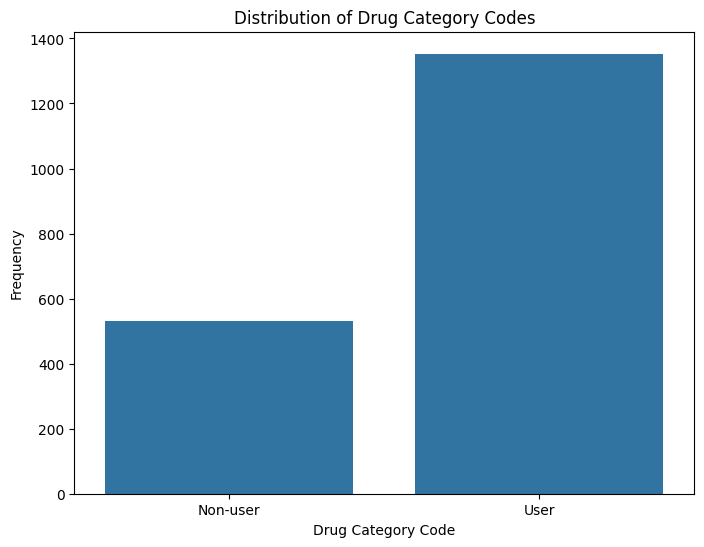

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot for the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Any_Drug_Use', data=data_binary)
plt.title('Distribution of Drug Category Codes')
plt.xlabel('Drug Category Code')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-user','User'])
plt.show()


Before creating models; 

final verification of the dataset

In [12]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nscore           1884 non-null   float64
 1   Escore           1884 non-null   float64
 2   Oscore           1884 non-null   float64
 3   Ascore           1884 non-null   float64
 4   Cscore           1884 non-null   float64
 5   Impulsive        1884 non-null   float64
 6   SS               1884 non-null   float64
 7   Gender           1884 non-null   int64  
 8   Age_Binary       1884 non-null   int64  
 9   Education_Level  1884 non-null   int64  
 10  Europe_vs_Rest   1884 non-null   int32  
 11  Any_Drug_Use     1884 non-null   int32  
dtypes: float64(7), int32(2), int64(3)
memory usage: 162.0 KB


In [ ]:
# importing all of the ML modules
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support

here,
the green hashtagged lines represent an attempt of introducing a crossvalidation method instead of the second validation split. However, after testing, it seems to underperform in comparison with standard double train_test_split.

due to our small dataset, maybe it would improve the validation and test set to increase the split maybe to 60/20/20 or 70/15/15

In [ ]:
# Assuming your data is already loaded into `data_binary`
X = data_binary.drop(['Any_Drug_Use'], axis=1)
y = data_binary['Any_Drug_Use']

# Split off the test set first
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=40, stratify=y)  # 15% for testing

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.15, random_state=40, stratify=y_train_temp)

# Use StratifiedKFold for the remaining training and validation data
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#
# X_train_folds = []
# X_val_folds = []


# y_train_folds = []
# y_val_folds = []

# Loop over the folds
# for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
#     X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    # X_train_folds.append(X_train)
    # X_val_folds.append(X_val)
    # y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

In [ ]:
# Evaluate models
def evaluate_model(model, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on both training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_metrics = precision_recall_fscore_support(y_train, y_train_pred, average='binary')
    val_metrics = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    
    # Display the results
    print(f"{model_name} Training - Avg Recall: {train_metrics[1]:.3f}, Avg Precision: {train_metrics[0]:.3f}, Avg F1: {train_metrics[2]:.3f}")
    print(f"{model_name} Validation - Avg Recall: {val_metrics[1]:.3f}, Avg Precision: {val_metrics[0]:.3f}, Avg F1: {val_metrics[2]:.3f}")
    print("-" * 80)  # seperators for better reading

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=413),
    'Random Forest': RandomForestClassifier(random_state=441, max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features='sqrt'),
    'Support Vector Machine': SVC(random_state=47, kernel='poly'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, name)



Logistic Regression Training - Avg Recall: 0.882, Avg Precision: 0.848, Avg F1: 0.865
Logistic Regression Validation - Avg Recall: 0.913, Avg Precision: 0.854, Avg F1: 0.883
--------------------------------------------------------------------------------
Random Forest Training - Avg Recall: 0.948, Avg Precision: 0.931, Avg F1: 0.939
Random Forest Validation - Avg Recall: 0.890, Avg Precision: 0.842, Avg F1: 0.865
--------------------------------------------------------------------------------
Support Vector Machine Training - Avg Recall: 0.924, Avg Precision: 0.844, Avg F1: 0.882
Support Vector Machine Validation - Avg Recall: 0.936, Avg Precision: 0.814, Avg F1: 0.871
--------------------------------------------------------------------------------
K-Nearest Neighbors Training - Avg Recall: 0.892, Avg Precision: 0.897, Avg F1: 0.894
K-Nearest Neighbors Validation - Avg Recall: 0.832, Avg Precision: 0.852, Avg F1: 0.842
-------------------------------------------------------------------

what a nice result!!!

it seems that there is a pattern of binary prediction of a drug user state based on their personality features and basic information. 

For this problem I am choosing the SVM model as it performs the best on almost default parameters. SVM is an easy to use algorithm, is memory-efficient. 

Diffrent approach could be taken to train a random forest or xgb. Usually, these algorithms are really sensitive to the proper choice of the parameters and thus, with default parameters overfit. Therefore, we could train random forest and xgb using train set and the most important to properly tune them using valdation set. 

Finally, we could compare all of these algorithms using test set. But as we were about to choose the model based on default parameters let's continue with the robust SVM.

In [14]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import recall_score, make_scorer, f1_score

# # Function to evaluate each model
# def evaluate_crossval(model, name):
#     # Compute cross-validation scores using recall as the scoring metric
#     recall_scorer = make_scorer(recall_score)  # Define custom scorer for recall
#     scores = cross_val_score(model, X_train_val, y_train_val, scoring=recall_scorer, cv=skf)
    
#     # Print the mean and standard deviation of the cross-validation scores
#     print(f"{name} - Recall: Mean={scores.mean():.3f}, StdDev={scores.std():.3f}")

# # Evaluate each model
# for name, model in models.items():
#     evaluate_crossval(model, name)

here again, some code that I wanted to use for the cross-validation methodology.

Due to my laptop limitation I had to use RandomizedSearchCV instead of GridSearch

finding the best parameters. keeping the recall metric in mind.

In [ ]:

# Adjust the parameter distribution with a more focused range
param_distributions = {
    'C': np.logspace(0, 2, 100), 
    'gamma': np.logspace(-1, 0, 100),  
    'degree': [2, 3],  
    'coef0': [0, 1],  
    'kernel': ['poly']  
}

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Setup RandomizedSearchCV with fewer iterations and fewer folds
random_search = RandomizedSearchCV(
    SVC(random_state=47), 
    param_distributions=param_distributions,
    n_iter=30,  # Fewer iterations
    scoring=recall_scorer, 
    cv=2,  # Fewer folds
    verbose=2, 
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV - this configuration should be faster
random_search.fit(X_train_val, y_train_val)

# Print the best parameters and the best score
print("Best parameters found:", random_search.best_params_)
print("Best recall obtained:", random_search.best_score_)

# Retrieve the best model from random search
best_svm = random_search.best_estimator_

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found: {'kernel': 'poly', 'gamma': 0.2154434690031884, 'degree': 2, 'coef0': 0, 'C': 1.321941148466029}
Best recall obtained: 0.8686956521739131


In [ ]:
# Evaluate this model on the validation data
y_val_pred = best_svm.predict(X_val)
val_recall = recall_score(y_val, y_val_pred)
print(f"Validation Recall with Best SVM: {val_recall:.3f}")

# Final evaluation on the test data
y_test_pred = best_svm.predict(X_test)
test_recall = recall_score(y_test, y_test_pred)
print(f"Test Recall with Best SVM: {test_recall:.3f}")


def tune_prediction_threshold(threshold:float, pred_proba:np.ndarray):
    """
    Only for binary
    """
    pred_proba_positive = pred_proba[:,1]
    return [1 if prob >= threshold else 0 for prob in pred_proba_positive]



# Tune threshold
# y_test_pred_proba = best_svm.predict_proba(X_test)


svc_clf = SVC(random_state=47, probability=True, **random_search.best_params_)
svc_clf.fit(X_train_temp, y_train_temp)

y_test_pred_proba = svc_clf.predict_proba(X_test)

#threshold can be adjusted according to the final result of recall I want to obtain
threshold = 0.25

preds_low_threshold = tune_prediction_threshold(threshold, y_test_pred_proba)

test_recall = recall_score(y_test, preds_low_threshold)
test_f1 = f1_score(y_test, preds_low_threshold)

print(f"Test Recall for {threshold}: {test_recall}")
print(f"Test f1-score for {threshold}: {test_f1}")

Validation Recall with Best SVM: 0.908
Test Recall with Best SVM: 0.892
Test Recall for 0.25: 0.9852216748768473
Test f1-score for 0.25: 0.8620689655172413


By playing with threshold (on default is 0.5); you can manipulate the precision and recall trade-off. 
The balance and trade-off of these validation metrics can be measured by F1-Score. But as we focusing on recall...

The next cell contains the confusion matrix and there is a comparison of default and adjusted threshold.

Confusion Matrix:
[[ 57  23]
 [ 22 181]]
Confusion Matrix diff threshold:
[[ 19  61]
 [  3 200]]


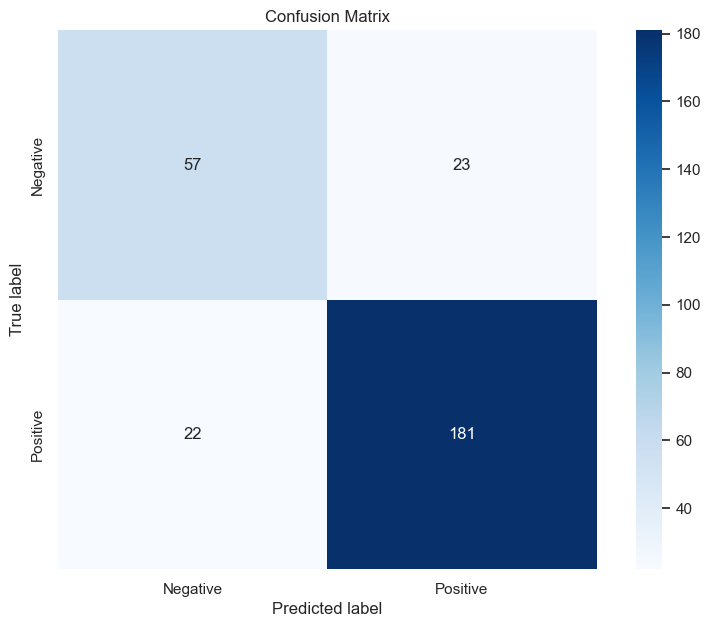

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# # Assuming best_svm_params is a dictionary containing the tuned parameters
# best_svm = SVC(**{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}, probability=True)
# best_svm.fit(X_train, y_train)  # You might add X_val and y_val here as well

# # Predict on test data
# y_test_pred = best_svm.predict(X_test)

# # Calculate metrics
# test_metrics = classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
# recall = test_metrics['Class 1']['recall']
# print(f"Test Recall: {recall:.3f}")
# print(classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1']))

# Optionally, calculate and display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix 0.5 threshold:")
print(conf_matrix)

conf_matrix_diff_threshold = confusion_matrix(y_test, preds_low_threshold)
print("Confusion Matrix diff threshold:")
print(conf_matrix_diff_threshold)

sns.set(style="whitegrid")

# Create the heatmap for the confusion matrix
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', square=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Try with PCA - following lines are just diffrent ideas to play with.

- removing tabacco from the analsis (tabacco is fully accepted and legal in society - is smoking not too common? and due to great number of cases it doesn't generize good, will make the target column less imbalanced )
- same with canabiss ( it has plenty of instances )
- checking PCA ()
- changing the train_test_split test_size 
- trying xgb or random forest with parameters

In [ ]:
import mglearn
from sklearn.decomposition import PCA

for_pca_df = data_binary.copy()

labels_columns= ['Any_Drug_Use']
labels = for_pca_df[labels_columns]
X_scaled = for_pca_df.drop(columns=labels_columns)

pca = PCA(n_components = 7)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1884, 11)
Reduced shape: (1884, 7)


In [ ]:
import numpy
print(f"The ratio of 7 components: {[round(x, 4) for x in pca.explained_variance_ratio_]}")
print(f"This is how much information is explained in those ten components: {round(numpy.sum(pca.explained_variance_ratio_),4)}")

The ratio of 7 components: [0.293, 0.229, 0.1121, 0.0855, 0.0734, 0.0617, 0.0456]
This is how much information is explained in those ten components: 0.9002


In [ ]:
from umap import UMAP

# X_check = data_binary.drop(columns=['Drug_Category_Code'])
# #y = df_ml['Drug_Category_Code_New']
# y_check = data_binary['Drug_Category_Code'].map(int)

dimred = UMAP(n_components=3)
X_red = dimred.fit_transform(X)
X_red

array([[ 5.1162205,  6.9549828,  9.507559 ],
       [ 5.0216   ,  4.3584585, 11.30069  ],
       [ 3.7247162,  4.1490755,  9.442325 ],
       ...,
       [ 7.770221 ,  3.8089762,  9.97012  ],
       [ 8.779311 ,  4.3392386,  9.436292 ],
       [ 6.2096806,  7.5142784,  9.185025 ]], dtype=float32)

AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

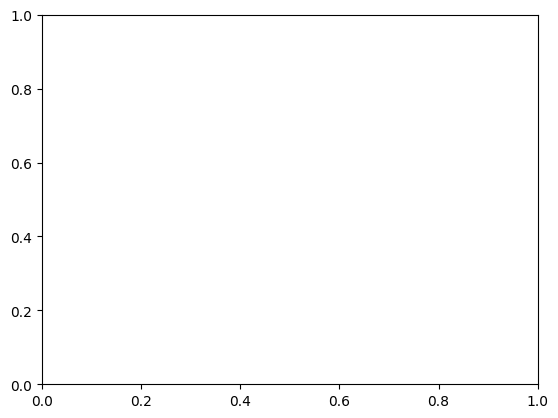

In [ ]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'purple']
labels = ['all user', 'non-user', 'light user']

for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y == i
    sns.scatterplot(x=X_red[mask,0], y=X_red[mask,1], z= X_red[mask,2], c=color, label=label, s=5)

plt.legend()